In [1]:
%matplotlib inline

参考：[可视化tiff数据 + 提交格式](https://tianchi.aliyun.com/forum/postDetail?postId=2580)

In [2]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tifffile #  pip install tifffile

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体, 为在 Matplotlib 中显示中文，设置特殊字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

root = r'E:\Data\Zip\GF6_WFV'
val_path = os.path.join(root, '验证集原始图像_8波段.tif')
train_ann_path = os.path.join(root, 'train_sha.txt')  # 训练的标注信息需要将中文文件名改为英文
train_path = os.path.join(root, 'GF6_WFV_E127.9_N46.8_20180823_L1A1119838015.tif')

train_anns = pd.read_csv(train_ann_path, encoding='utf-16')
train_anns.index = train_anns.pop('FID')
train_anns

,Id,作物,半径,备注,x,y
FID,,,,,,
0,1,玉米,3,,12500.700195,-3286.560059
1,2,玉米,3,,4691.490234,-16000.799805
2,3,玉米,3,,4567.209961,-15911.599609
3,4,玉米,3,,4706.979981,-15837.400391
4,5,玉米,3,,4726.129883,-15798.299805
5,6,玉米,3,,4902.569824,-15855.000000
6,7,玉米,3,,4880.970215,-15751.500000
7,8,玉米,3,,4819.439941,-15760.799805
8,9,玉米,3,,4516.680176,-16036.299805


In [3]:
imgs = tifffile.imread(train_path).transpose((1, 2, 0))
imgs.shape

(17810, 50362, 8)

In [4]:
plt.imsave(os.path.join(root, '2.jpg'), imgs[:1000,:1500,1])

In [5]:
x0, y0 = .0, 1e-07

In [32]:
raster = []
for fid in range(len(train_anns)):
    a = train_anns.iloc[fid]
    x_l = int(round(a.x))
    y_l = -int(round(a.y))
    r = a['半径']
    raster.append([a['作物'], x_l - r, y_l - r, x_l + r+1, y_l + r+1])

In [7]:
def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0) # 1% 分位数
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

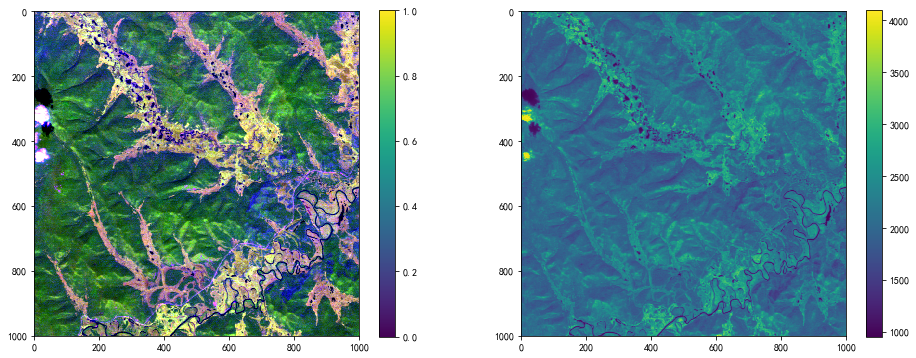

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

p1 = plt.subplot(121)
i1 = p1.imshow(scale_percentile(imgs[:1000, :1000,4:7]))
plt.colorbar(i1)

p2 = plt.subplot(122)
i2 = p2.imshow(imgs[:1000, :1000, 3])
plt.colorbar(i2)

plt.show()

In [33]:
ob = raster[0]
ob, imgs.dtype

(['玉米', 12498, 3284, 12505, 3291], dtype('uint16'))

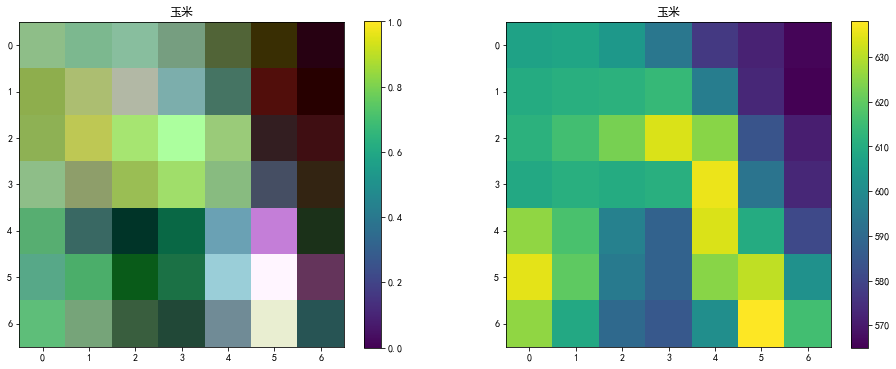

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))
p1 = plt.subplot(121)
i1 = p1.imshow(scale_percentile(imgs[ob[1]:ob[3], ob[2]:ob[4],:3]))
plt.colorbar(i1)
plt.title(ob[0])

p2 = plt.subplot(122)
i2 = p2.imshow(imgs[ob[1]:ob[3], ob[2]:ob[4], 4])
plt.colorbar(i2)
plt.title(ob[0])

plt.show()

各个通道的图像：

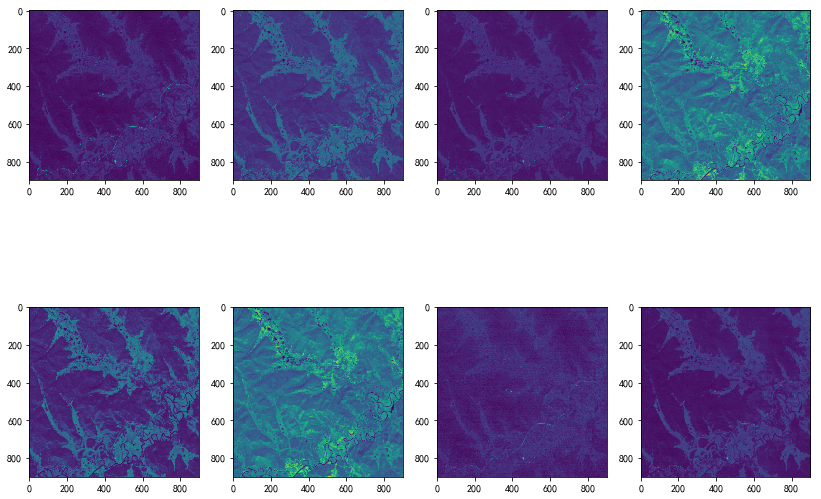

In [11]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(14, 10))

for i in range(8):
    p = plt.subplot(241+i)
    p.imshow(imgs[100:1000, 100:1000, i])
plt.show()

In [ ]:
class Loader:
    def __init__(self, )